In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv(r"C:\Users\Malli Mounika\Downloads\Housing1.csv")  
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
# Feature Engineering (NEW FEATURES)
# Price per square foot

df['price_per_sqft'] = df['price'] / df['area']

In [14]:
#Area × Bedrooms (Interaction Feature)

df['area_bedroom_interaction'] = df['area'] * df['bedrooms']

In [16]:
#Encode Categorical Variables
#Yes/No columns → Label Encoding
from sklearn.preprocessing import LabelEncoder

binary_cols = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
#Furnishing status → One-Hot Encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [18]:
#Prepare X and y

X = df.drop('price', axis=1)
y = df['price']

In [19]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
#Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:",
      np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2:",
      r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 757508.8040706165
Linear Regression R2: 0.8864750987172931


In [21]:
#Decision Tree Model (Feature Importance)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree RMSE:",
      np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R2:",
      r2_score(y_test, y_pred_dt))

Decision Tree RMSE: 723180.7338786141
Decision Tree R2: 0.8965311889314694


In [22]:
#Feature Importance

importance = pd.Series(
    dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)

area_bedroom_interaction           0.403282
price_per_sqft                     0.378159
area                               0.197554
basement                           0.007011
furnishingstatus_unfurnished       0.002760
bedrooms                           0.002719
furnishingstatus_semi-furnished    0.002008
parking                            0.001948
prefarea                           0.001173
hotwaterheating                    0.001163
dtype: float64

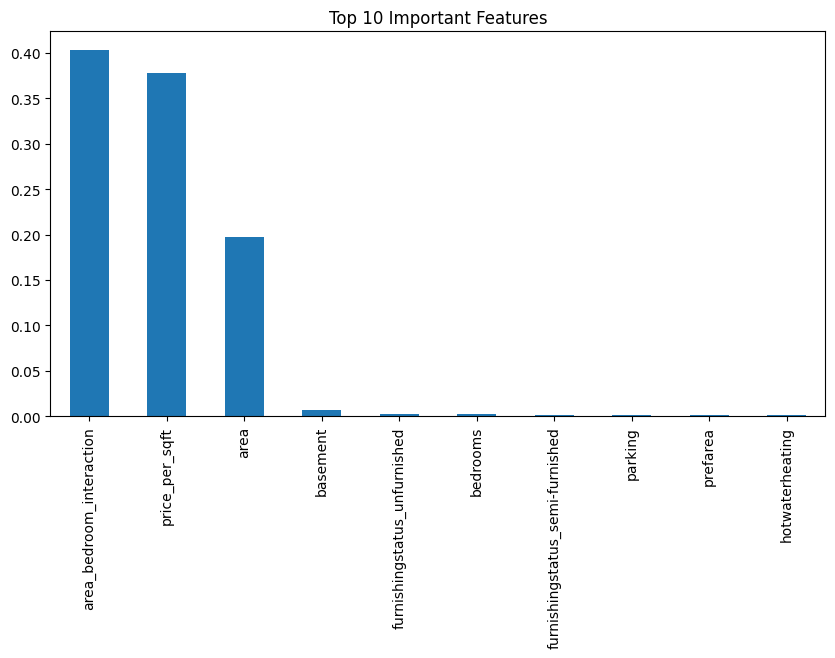

In [23]:
#Plot Feature Importance

importance.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Important Features")
plt.show()